'''
Description about json :-<br>
1. annotations -"array" - with objects :-<br>
    a. id - identifier for image (int) <br>
    b. image_id - identifier(string) (int)<br>
    c. segmentation -polygon <br>
    d. area - area of the bounding box <br>
    e. bbox - coordinates of bounding box in order - x(from top left),y(from top left),width,height of the bounding box<br>
    f. iscrowd-flag<br>

eg. {'id': 0,
 'image_id': '0',
 'segmentation': [81, 24, 214, 24, 214, 167, 81, 167],
 'area': 19019,
 'bbox': [81, 24, 133, 143],
 'iscrowd': 0}<br>

2. categories- this will store the attributes in key/value pairs<br>

in the example below :- attribute is type - with value "bird"
"categories": [
    {
      "id": 1,
      "name": "bird",
      "supercategory": "type"
    }

3. images - "array" with objects :-<br>
    a. id - identifier for uploaded image<br>
    b. width - width of uploaded image<br>
    c. height- height of uploaded image<br>
    d. filename - name of the uploaded image<br>
    e. license - getting populated from license (key /value pair) stored separately<br>
    f. date_captured - empty <br>

4.info - dictionary- key/value - length 6 - about the annotation tool<br>
    a. year - current year<br>
    b. version- version of the tool<br>
    c. description - description of the website <br>
    d. contributor<br>
    e. url <br>
    f. date_created - timestamp of using the tools<br>

5. licenses - key/value pair - length 1

In [0]:
from format_json import formatted_out
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans


In [0]:
#getting output as bbox height and bbox width scaled using image height and width from the json
X=formatted_out(filename='via_export_coco_19apr.json')

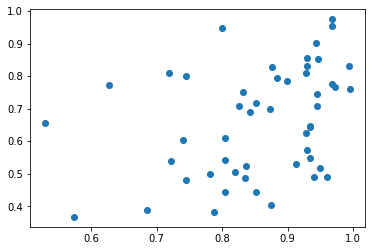

In [20]:
#plotting scaled bbox height and bbox width
plt.scatter(X.new_b_height, X.new_b_width)    



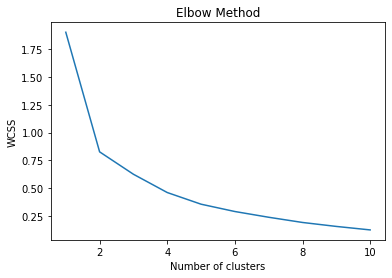

In [21]:
#calculating optimum number of clusters 
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

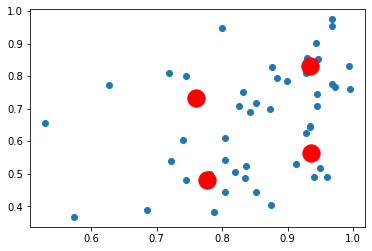

In [22]:
#Plotting 4 clusters 
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X.new_b_height, X.new_b_width)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()